# Injectivity t/hr.bar

Select the locations on the completion test data

Do a linear interpolation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from ipywidgets import interactive, Layout, FloatSlider
from utilities import* # functions in the utilities.py file

In [2]:
flowrate = read_flowrate(r'Data-FlowRate.xlsx')
pts = read_pts(r'Data-PTS.xlsx')

In [3]:
flowrate['timestamp'] = datetime_to_timestamp(flowrate.datetime)
pts['timestamp'] = datetime_to_timestamp(pts.datetime);

In [4]:
# interpolate flow rates onto the PTS dataframe using time

In [4]:
pts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101293 entries, 0 to 101292
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   depth_m        101293 non-null  float64       
 1   speed_mps      101208 non-null  float64       
 2   cweight_kg     101293 non-null  float64       
 3   whp_barg       101293 non-null  float64       
 4   temp_degC      101293 non-null  float64       
 5   pressure_bara  101293 non-null  float64       
 6   frequency_hz   94238 non-null   float64       
 7   datetime       101293 non-null  datetime64[ns]
 8   timestamp      101293 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 7.0 MB


In [5]:
flowrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   711 non-null    datetime64[ns]
 1   flow_tph   711 non-null    float64       
 2   timestamp  711 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.8 KB


In [6]:
#from ipywidgets import interactive, Layout, FloatSlider
# fix legend display here and in other figures

min_timestamp = pts.timestamp.iloc[0]
max_timestamp = pts.timestamp.iloc[-1]

def subselect_plot(first_value, second_value, third_value):
    f,ax1 = plt.subplots(1,1, figsize = (20,6))
    ax1.plot(pts.timestamp, pts.depth_m, c = 'k', label = 'PTS tool depth')
    ax2 = ax1.twinx()
    ax2.plot(flowrate.timestamp, flowrate.flow_tph, c='k', linestyle = ':', label='Surface pump flowrate')
    ymin = pts.depth_m.min()
    ymax = pts.depth_m.max() + 100
    ax1.vlines(first_value, ymin, ymax, color='tab:green')
    ax1.vlines(second_value, ymin, ymax, color='tab:orange')
    ax1.vlines(third_value, ymin, ymax, color='tab:red')
    ax1.set_ylim(pts.depth_m.max() + 100, 0)

result = interactive(subselect_plot,
         
         first_value = FloatSlider
         (
             value = (max_timestamp - min_timestamp)/6 + min_timestamp,
             description = '1st value',
             min = min_timestamp, 
             max = max_timestamp, 
             step = 10, 
             continuous_update=True,
             layout = Layout(width='80%'),
             ),
          
          second_value = FloatSlider
          (
             value = (max_timestamp - min_timestamp)/4 + min_timestamp, 
             description = '2nd value',
             min = min_timestamp, 
             max = max_timestamp, 
             step = 10, 
             continuous_update=True,
             layout = Layout(width='80%')
             ),

          third_value = FloatSlider
          (
             value = (max_timestamp - min_timestamp)/2 + min_timestamp, 
             description = '3rd value',
             min = min_timestamp, 
             max = max_timestamp, 
             step = 10, 
             continuous_update=True,
             layout = Layout(width='80%')
             )
)

display(result);

# look into this for zoom https://towardsdatascience.com/how-to-produce-interactive-matplotlib-plots-in-jupyter-environment-1e4329d71651
# donest look to be working with ipywidgets

interactive(children=(FloatSlider(value=1607636262.096, description='1st value', layout=Layout(width='80%'), m…

In [7]:
# extract pressure and flow rate at the marked points
print(
    '1st value =',result.children[0].value, ' which is', datetime.fromtimestamp(result.children[0].value), 
    '\n 2nd value =', result.children[1].value, ' which is', datetime.fromtimestamp(result.children[1].value),
    '\n 3rd value =', result.children[2].value, ' which is', datetime.fromtimestamp(result.children[2].value),
    )


1st value = 1607636262.096  which is 2020-12-11 10:37:42.096000 
 2nd value = 1607638390.92  which is 2020-12-11 11:13:10.920000 
 3rd value = 1607644777.392  which is 2020-12-11 12:59:37.392000


In [47]:
def find_index(value, df, colname):
    '''
    Find the dataframe index for the exact matching value or nearest two values

    args:   value: (float or int) the search term
            df: (obj) the name of the dataframe that is searched
            colname: (str) the name of the coloum this is searched

    returns:  dataframe index(s) for the matching value or the two adjacent values
              rows can be called from a df using df.iloc[[index_number,index_number]]
    '''
    exactmatch = df[df[colname] == value]
    if not exactmatch.empty:
        return exactmatch.index
    else:
        lowerneighbour_index = df[df[colname] < value][colname].idxmax()
        upperneighbour_index = df[df[colname] > value][colname].idxmin()
        return [lowerneighbour_index, upperneighbour_index] 

pts_timestamp_search = pts.iloc[find_index(1607640024.448, pts, 'timestamp')]
pts_datetime_search = pts.iloc[find_index(pd.to_datetime('2020-12-11 11:40:24.448000'), pts, 'datetime')]

flowrate_datetime_search = flowrate.iloc[find_index(pd.to_datetime('2020-12-11 11:40:24.448000'), flowrate, 'datetime')]
flowrate_timestamp_search = flowrate.iloc[find_index(1607640024.448, flowrate, 'timestamp')]

In [48]:
pts_timestamp_search

,depth_m,speed_mps,cweight_kg,whp_barg,temp_degC,pressure_bara,frequency_hz,datetime,timestamp
31879,779.7876,0.0,143.04149,-0.611040,49.995600,37.751965,4.461155,2020-12-11 11:40:24.096,1.607640e+09
31883,779.7876,0.0,142.92238,-0.611426,49.990414,37.745500,4.527269,2020-12-11 11:40:24.960,1.607640e+09


In [49]:
pts_datetime_search

,depth_m,speed_mps,cweight_kg,whp_barg,temp_degC,pressure_bara,frequency_hz,datetime,timestamp
31879,779.7876,0.0,143.04149,-0.611040,49.995600,37.751965,4.461155,2020-12-11 11:40:24.096,1.607640e+09
31883,779.7876,0.0,142.92238,-0.611426,49.990414,37.745500,4.527269,2020-12-11 11:40:24.960,1.607640e+09


In [50]:
flowrate_datetime_search

,datetime,flow_tph,timestamp
335,2020-12-11 11:40:00,122.850571,1.607640e+09
336,2020-12-11 11:41:00,122.850571,1.607640e+09


In [51]:
flowrate_timestamp_search

,datetime,flow_tph,timestamp
335,2020-12-11 11:40:00,122.850571,1.607640e+09
336,2020-12-11 11:41:00,122.850571,1.607640e+09


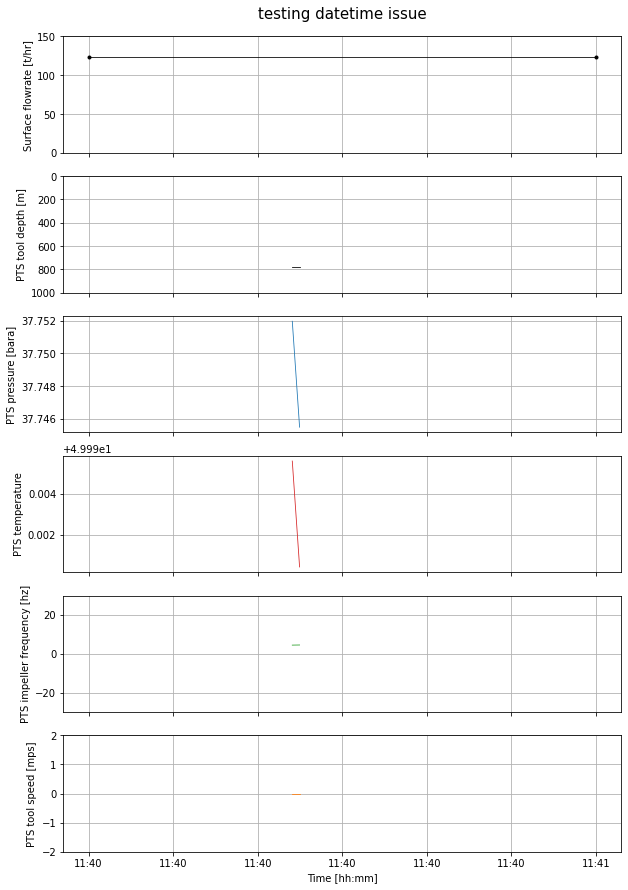

In [52]:
overview_fig(pts_timestamp_search, flowrate_timestamp_search, title = 'testing datetime issue').show()

In [9]:
# call the pressure and flowrate values form the df

# Interpolate values from the df's based on timestamp

# do a plot to check the result

# find a 

In [ ]:
# do linear interpolation to find II

***

The next notebook is 4-feedzones.ipynb

***

<p><center>© 2020 <a href="https://www.cubicearth.nz/">Irene Wallis</a> and <a href="https://www.linkedin.com/in/katie-mclean-25994315/">Katie McLean</a> <a href="https://creativecommons.org/licenses/by/4.0/">CC-BY</a></center></p>
